# Soccer Data
This dataset contains data of every game from the 2018-2019 season in the English Premier League. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [16]:
import pandas as pd

pd.read_csv("soccer18-19.csv")

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What team commits the most fouls?
- 📊 **Visualize**: Plot the percentage of games that ended in a draw over time.
- 🔎 **Analyze**: Does the number of red cards a team receives have an effect on its probability of winning a game?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired as a data analyst for a local soccer team. The team has recently signed on some junior players and wants to give them as much experience as possible without losing games. If the head coach could be confident in the outcome of a game by halftime, they would be more likely to give the junior players time on the field.

The coach has asked you whether you can predict the outcome of a game by the results at halftime and how confident you would be in the prediction. 

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [17]:
import pandas as pd

df = pd.read_csv("soccer18-19.csv")

# Compute the total number of red cards for each team
red_cards = df.groupby('HomeTeam')['HR'].sum()

# Find the team with the most red cards
most_red_cards = red_cards.idxmax()

# Print the team with the most red cards
print('The team with the most red cards is:', most_red_cards)

The team with the most red cards is: Huddersfield


In [18]:
import pandas as pd

df = pd.read_csv("soccer18-19.csv")

# Compute the total number of red cards for each team
red_cards = df.groupby('AwayTeam')['AR'].sum()

# Find the team with the most red cards
most_red_cards = red_cards.idxmax()

# Print the team with the most red cards
print('The team with the most red cards is:', most_red_cards)

The team with the most red cards is: Everton


(array([ 2.,  0., 12.,  0.,  0.,  2.,  0.,  3.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

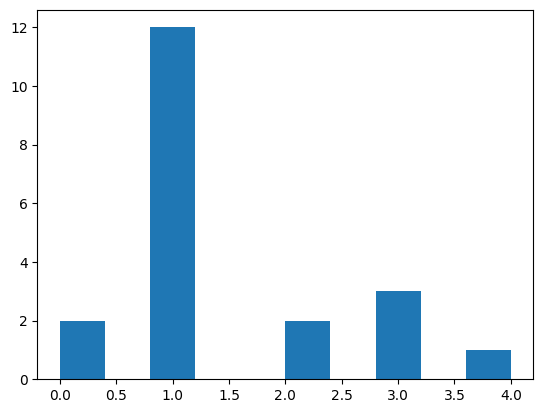

In [22]:
import matplotlib.pyplot as plt 
plt.hist(red_cards)


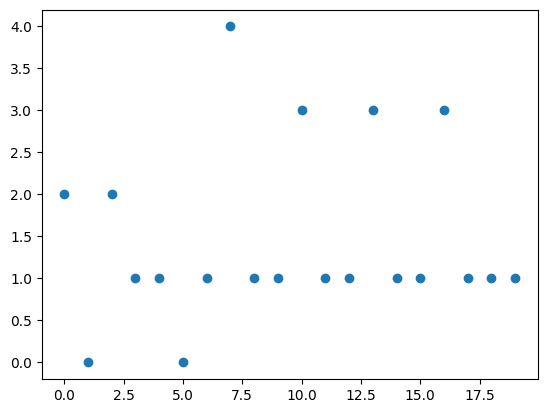

In [20]:
plt.scatter(x=range(len(red_cards)), y=red_cards)

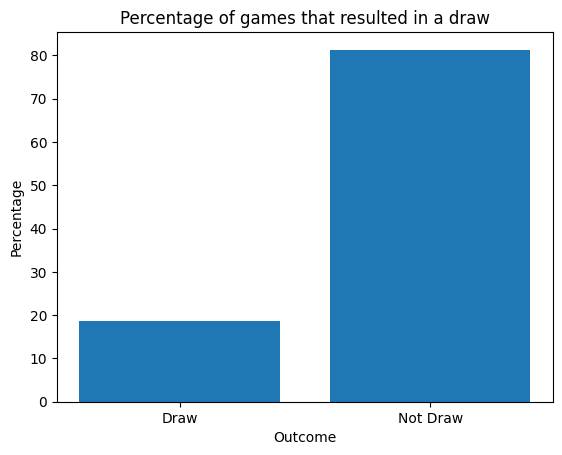

In [24]:

# Compute the percentage of games that resulted in a draw
num_draws = df[df['FTR'] == 'D'].shape[0]
num_total = df.shape[0]
pct_draws = num_draws / num_total * 100

# Plot a bar chart of the percentage of games that resulted in a draw
plt.bar(['Draw', 'Not Draw'], [pct_draws, 100 - pct_draws])
plt.title('Percentage of games that resulted in a draw')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the CSV file into a pandas DataFrame


# Create a new DataFrame with the number of red cards received by each team in each game
red_cards = pd.DataFrame({
    'Team 1 Red Cards': df['Team 1 Red Cards'],
    'Team 2 Red Cards': df['Team 2 Red Cards'],
})

# Compute the difference in red cards between the two teams in each game
red_card_diff = red_cards['Team 1 Red Cards'] - red_cards['Team 2 Red Cards']

# Add the red card difference to the DataFrame as a new column
df['Red Card Diff'] = red_card_diff

# Create a new DataFrame with the red card difference and the outcome of each game
data = pd.DataFrame({
    'Red Card Diff': df['Red Card Diff'],
    'Outcome': df['Outcome'],
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Red Card Diff']], data['Outcome'], test_size=0.2)

# Train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the outcomes of the games in the testing set using the trained model
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print('Model accuracy:', accuracy)
